Equações e teoria da página 99 do Miranda.

Equação do volume de cauda horizontal
$$
\begin{equation}
V_{HT} = \frac{I_{HT}.S_{HT}}{\bar c.S} [2.62]
\end{equation}
$$

Valores recomendados

$$
\begin{equation}
0,35 < V_{HT} < 0,5
\end{equation}
$$
Equação do volume de cauda horizontal
 vertical
$$
V_{VT} = \frac{I_{VT}.S_{VT}}{b.S}    [2.63]
$$

Valores recomendados

$$
0,04 < V_{VT} < 0,06
$$

# Código antigo do sorriso

(-0.1825465, 0.9404764999999999, -0.17415365850066322, 0.13722682851392787)

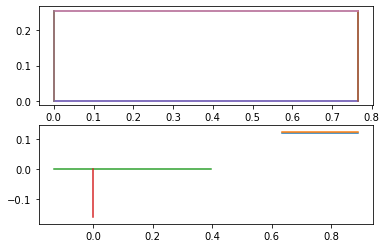

In [1]:
import numpy as np
import matplotlib.pyplot as plt

calc = (3.2-1.86) - ((1 / 4) * 0.526)

x = 889.43 / 1000
S = 0.843
b = 1.86
c_medium = 0.463
AR = 3
teta = np.linspace(np.pi/36, np.pi/18, 20)
# l_ht = 0.67874
cht = np.linspace(.150,.400, 20)
s_it = (cht ** 2) * AR
# bht = (s_it / cht)

V_ht = [0.35, 0.5]

# s_it = np.linspace(0,1,200)
Vht = list(); Sht_old = list(); lht_save = list(); lht_f = list(); Sht_f = list(); teta_save = list()

for k in teta:
    l_ht = (x - cht * (3 / 4)) / np.cos(k)
    for i, S_ht in enumerate(s_it):
        Vht_test = ((l_ht) * S_ht) / (c_medium * S)
        for j in range(0, len(Vht_test)):
            x_test = l_ht[j] * np.cos(k) + (3 / 4) * (S_ht / AR) ** (1 / 2)
            if (Vht_test[j] >= V_ht[0] and Vht_test[j] <= V_ht[1] and x_test <= x and x_test >= x*0.99):
                Vht.append(Vht_test[j])
                Sht_old.append(S_ht)
                lht_save.append(l_ht[j])
                teta_save.append(k)
        
Sht_n = np.array(Sht_old)
lht_n = np.array(lht_save)

# for indx, i in enumerate(lht_save):
#     if i >= (max(lht_save) * 0.99):
#         lht_f.append(i)
#         Sht_f.append(Sht_old[indx])

# Sht_n = np.array(Sht_f)
# lht_n = np.array(lht_f)

c_ht = (Sht_n / AR) ** (1 / 2)
b_ht = (Sht_n / c_ht)

data = np.array((Vht, lht_n, c_ht, b_ht, teta_save))

cont = 0
for i in range(0, len(data[1])):
    it = i - cont
    if (data[1][it] < (0.999 * max(data[1]))):
        data = np.delete(data, it, 1)
        cont += 1

cont = 0
for i in range(0, len(data[0])):
    it = i - cont
    if (data[0][it] < (0.999 * max(data[0]))):
        data = np.delete(data, it, 1)
        cont += 1

x_cord = np.empty((len(data[4])))
y_cord = np.empty((len(data[4])))


for i in range(0, len(data[4])):
    y_cord[i] = data[1][i] * np.sin(data[4][i])
    x_cord[i] = data[1][i] * np.cos(data[4][i])


fig, (ax1, ax2) = plt.subplots(2,1)
for i in range(0,len(data[0])):
    
    ax1.plot([0, data[3][i]], [0, 0]) 
    ax1.plot([data[3][i], data[3][i]], [0, data[2][i]])
    ax1.plot([0, data[3][i]], [data[2][i], data[2][i]]) 
    ax1.plot([0, 0], [0, data[2][i]])
    ax2.plot([(x_cord[i] - (data[2][i] / 4)), x_cord[i] + ((3/4) * data[2][i])], [y_cord[i], y_cord[i]])

ax2.plot([-(1/4)*0.526,(3/4)*0.526],[0,0])
ax2.plot([0,0], [0,-0.16])
ax2.set_xlim(0, 1)
plt.axis('equal')

# Vvt = (l_vt * S_vt) / (b * S) 

